In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2

In [25]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)
new_directory = '/home/valentin/Desktop/Licenta-Models/chest_xray/chest_xray'
os.chdir(new_directory)
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /home/valentin/Desktop/Licenta-Models/chest_xray/chest_xray
Current working directory: /home/valentin/Desktop/Licenta-Models/chest_xray/chest_xray


In [26]:
train_pneumonia = 'train'
test_pneumonia = 'test'
valid_pneumonia = 'val'

In [27]:
train_directory = os.path.join(current_directory, train_pneumonia)
test_directory = os.path.join(current_directory, test_pneumonia)
valid_directory = os.path.join(current_directory, valid_pneumonia)
print(train_directory)

/home/valentin/Desktop/Licenta-Models/chest_xray/chest_xray/train


In [28]:
def rescale_images_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is not None:
                    rescaled_image = image / 255.0

                    cv2.imwrite(image_path, rescaled_image * 255.0)

In [29]:
rescale_images_in_directory(train_directory)
rescale_images_in_directory(test_directory)
rescale_images_in_directory(valid_directory)

KeyboardInterrupt: 

In [30]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_directory, target_size=(224,224), classes=['PNEUMONIA', 'NORMAL'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_directory, target_size=(224,224), classes=['PNEUMONIA', 'NORMAL'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_directory, target_size=(224,224), classes=['PNEUMONIA', 'NORMAL'], batch_size=10, shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [31]:
assert train_batches.n == 5216
assert valid_batches.n == 16
assert test_batches.n == 624

In [32]:
imgs, labels = next(train_batches)

In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

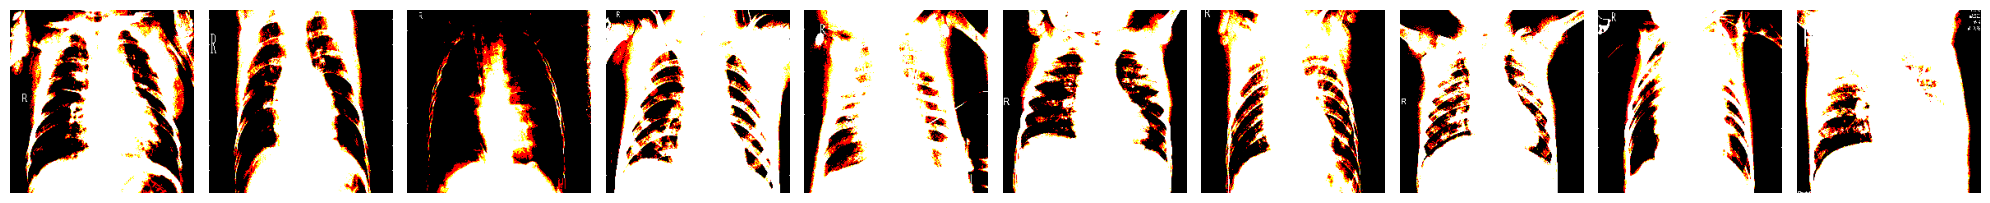

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [9]:
plotImages(imgs)
print(labels)


In [34]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
522/522 - 28s - loss: 1.9143 - accuracy: 0.9365 - val_loss: 0.0355 - val_accuracy: 1.0000 - 28s/epoch - 53ms/step
Epoch 2/10
522/522 - 26s - loss: 0.1550 - accuracy: 0.9814 - val_loss: 6.3162 - val_accuracy: 0.5625 - 26s/epoch - 51ms/step
Epoch 3/10
522/522 - 27s - loss: 0.0638 - accuracy: 0.9883 - val_loss: 1.3507 - val_accuracy: 0.8750 - 27s/epoch - 51ms/step
Epoch 4/10
522/522 - 27s - loss: 0.0292 - accuracy: 0.9937 - val_loss: 0.1211 - val_accuracy: 0.9375 - 27s/epoch - 51ms/step
Epoch 5/10
522/522 - 27s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.1664 - val_accuracy: 0.9375 - 27s/epoch - 51ms/step
Epoch 6/10
522/522 - 27s - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.0053 - val_accuracy: 1.0000 - 27s/epoch - 51ms/step
Epoch 7/10
522/522 - 26s - loss: 0.0212 - accuracy: 0.9950 - val_loss: 4.1097 - val_accuracy: 0.6875 - 26s/epoch - 50ms/step
Epoch 8/10
522/522 - 27s - loss: 0.0445 - accuracy: 0.9914 - val_loss: 0.7803 - val_accuracy: 0.8125 - 27s/epoch - 51ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

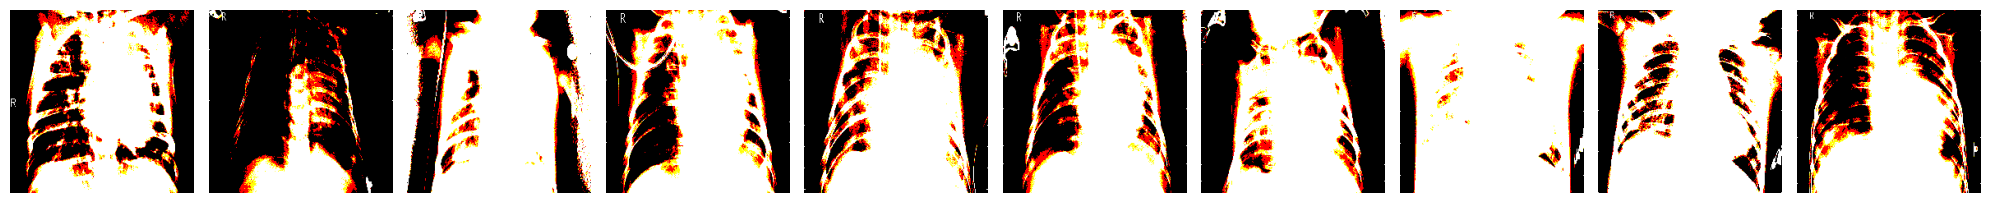

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [15]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [16]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[388   2]
 [149  85]]


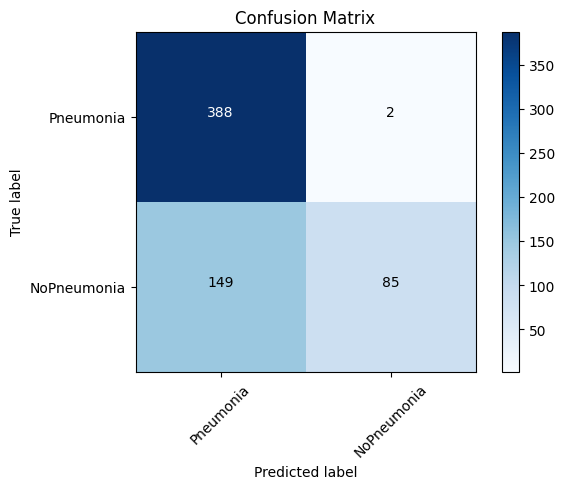

In [18]:
cm_plot_labels = ['Pneumonia','NoPneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [19]:
gen = ImageDataGenerator(rotation_range=3, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [20]:
chosen_image = random.choice(os.listdir('../Licenta-Data/Train/Chest/Pneumonia'))

FileNotFoundError: [Errno 2] No such file or directory: '../Licenta-Data/Train/Chest/Pneumonia'

In [21]:
image_path = '../Licenta-Data/Train/Chest/Pneumonia/' + chosen_image

NameError: name 'chosen_image' is not defined

In [22]:
assert os.path.isfile(image_path)

NameError: name 'image_path' is not defined

In [ ]:
image = np.expand_dims(plt.imread(image_path),0)

In [ ]:
plt.imshow(image[0])

In [ ]:
rgb_image = np.add(image, 3)
print(rgb_image.shape)
aug_iter = gen.flow(rgb_image)

In [ ]:
aug_iter = gen.flow(rgb_image)

In [ ]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [ ]:
plotImages(aug_images)

In [ ]:
for i in range(10):
    augmented_image = next(aug_iter)[0].astype(np.uint8)
    cv2.imwrite(f'../Licenta-Data/Train/Chest/Pneumonia/aug-image-{i}.jpeg', augmented_image)


In [39]:
import os
directory_path = '../Licenta-Data/Train/Chest/Pneumonia'

image_files = os.listdir(directory_path)

batch_size = 1000
for batch_start in range(0, len(image_files), batch_size):
    batch_image_files = image_files[batch_start:batch_start + batch_size]

    for i, chosen_image in enumerate(batch_image_files):
        image_path = os.path.join(directory_path, chosen_image)

        if os.path.isfile(image_path):
            image = cv2.imread(image_path)

            augmented_images = [next(gen.flow(np.expand_dims(image, 0)))[0].astype(np.uint8) for _ in range(10)]

            for j, augmented_image in enumerate(augmented_images):
                save_path = os.path.join(directory_path, f'aug-image-{i}-{j}.jpeg')
                cv2.imwrite(save_path, augmented_image)

print("Augmentation complete for all images.")

FileNotFoundError: [Errno 2] No such file or directory: '../Licenta-Data/Train/Chest/Pneumonia'

In [40]:
tf.keras.models.save_model(model, '/home/valentin/Desktop/Licenta-Models/pneumonia_model')

INFO:tensorflow:Assets written to: /home/valentin/Desktop/Licenta-Models/pneumonia_model/assets


INFO:tensorflow:Assets written to: /home/valentin/Desktop/Licenta-Models/pneumonia_model/assets
